In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df=pd.read_csv(r"E:\Pandas EDA\Hotel_bookings_EDA\hotel_bookings.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

__Data cleanning__

In [9]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [12]:
con=(df.adults==0) & (df.children==0) & (df.babies==0)

In [18]:
df2=df[con==False]

In [22]:
df2[df2.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [26]:
df2.duplicated().sum()

31980

In [28]:
data=df2.drop_duplicates().copy()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

### Descriptive Analysis

In [34]:
da=data.describe().T

In [36]:
da.loc[['lead_time','adr','total_of_special_requests']['lead_time','adr','total_of_special_requests']]

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0


In [38]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [41]:
for col in ['lead_time','adr','total_of_special_requests']:
    print(f'feature name : {col}')

    for i in range (90,101,1):
        qv=np.quantile(data[col],q=i/100)
        print(f'quantile value is {i,qv}')
    print('\n')

feature name : lead_time
quantile value is (90, 204.0)
quantile value is (91, 212.0)
quantile value is (92, 220.0)
quantile value is (93, 230.0)
quantile value is (94, 241.0)
quantile value is (95, 256.0)
quantile value is (96, 272.0)
quantile value is (97, 291.0)
quantile value is (98, 315.0)
quantile value is (99, 347.0)
quantile value is (100, 737.0)


feature name : adr
quantile value is (90, 174.0)
quantile value is (91, 179.0)
quantile value is (92, 185.0)
quantile value is (93, 190.0)
quantile value is (94, 197.1)
quantile value is (95, 204.13300000000018)
quantile value is (96, 213.0)
quantile value is (97, 225.0)
quantile value is (98, 239.0)
quantile value is (99, 261.6207000000011)
quantile value is (100, 5400.0)


feature name : total_of_special_requests
quantile value is (90, 2.0)
quantile value is (91, 2.0)
quantile value is (92, 2.0)
quantile value is (93, 2.0)
quantile value is (94, 2.0)
quantile value is (95, 2.0)
quantile value is (96, 2.0)
quantile value is (97, 3.0)

__Saptial Analysis__

In [43]:
#where do from guest come

In [54]:
gc=data.country.value_counts().reset_index()[0:20]

In [55]:
gc

,country,count
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
5,ITA,3061
6,IRL,3015
7,BEL,2081
8,BRA,1993
9,NLD,1910


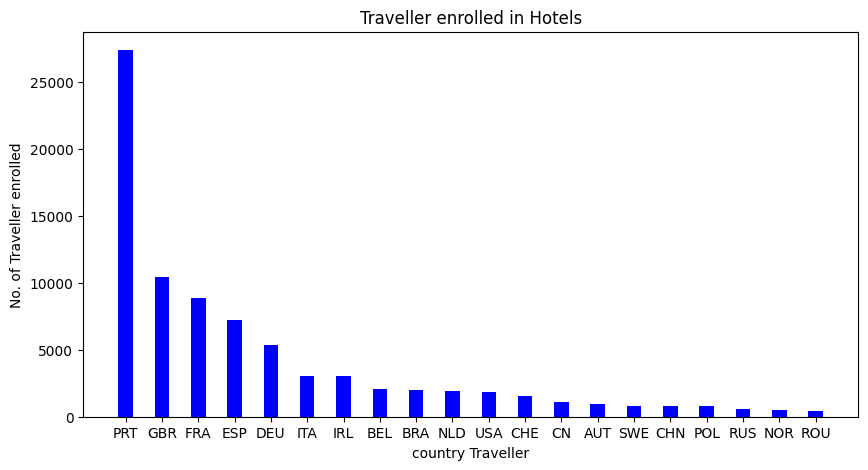

In [56]:
fig = plt.figure(figsize = (10, 5))
plt.bar('country', 'count',data=gc, color ='blue', 
        width = 0.4)
 
plt.xlabel("country Traveller")
plt.ylabel("No. of Traveller enrolled")
plt.title("Traveller enrolled in Hotels")
plt.show()

In [62]:
gc=data[data.is_canceled==0]
gc

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [67]:
gc=gc.reset_index()


In [71]:
gcbar=gc.iloc[0:11]

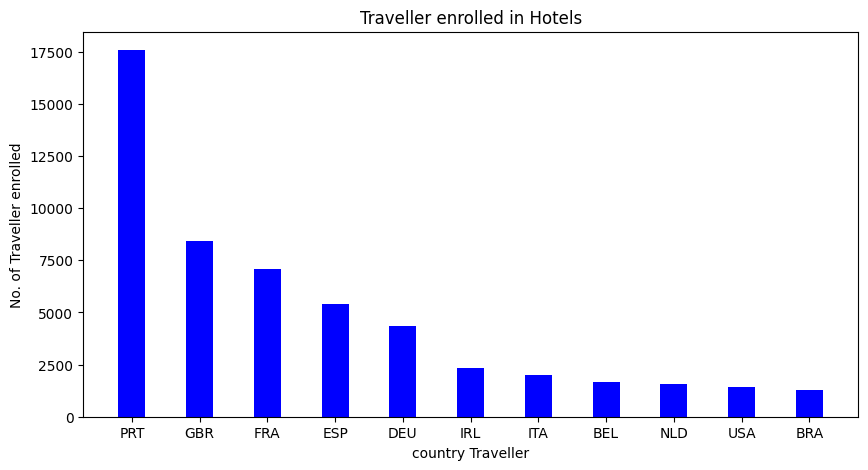

In [72]:
fig = plt.figure(figsize = (10, 5))
plt.bar('country', 'count',data=gcbar, color ='blue', 
        width = 0.4)
 
plt.xlabel("country Traveller")
plt.ylabel("No. of Traveller enrolled")
plt.title("Traveller enrolled in Hotels")
plt.show()

In [73]:
gc

,country,count
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [76]:
import chart_studio.plotly as pl
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [77]:
init_notebook_mode(connected=True)

In [78]:
mapss=px.choropleth(data_frame=gc,locations=gc['country'],color=gc['count'],hover_name=gc['country'],title='Home country of guest')

In [79]:
mapss.show()

__Any diffrence betwwen assigned room and reserved room__

In [80]:
df.assigned_room_type

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 119390, dtype: object

In [81]:
df.reserved_room_type

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object

In [89]:
piv=pd.crosstab(index=data.reserved_room_type,columns=data.assigned_room_type,margins=True)

In [90]:
piv

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [94]:
piv=pd.crosstab(index=data.reserved_room_type,columns=data.assigned_room_type,margins=True,normalize='index').round(2)*100

In [95]:
piv

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [103]:
# cm = sns.light_palette("red", as_cmap=True)

s = piv.style.background_gradient(cmap='viridis')
s

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.000000,2.000000,2.000000,11.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B,11.000000,88.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
C,1.000000,0.000000,95.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
D,2.000000,0.000000,0.000000,92.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E,0.000000,0.000000,0.000000,0.000000,90.000000,6.000000,2.000000,0.000000,1.000000,0.000000,0.000000
F,0.000000,0.000000,0.000000,0.000000,1.000000,93.000000,4.000000,0.000000,0.000000,0.000000,0.000000
G,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,98.000000,0.000000,1.000000,0.000000,0.000000
H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,97.000000,1.000000,0.000000,0.000000
L,17.000000,17.000000,17.000000,0.000000,0.000000,17.000000,0.000000,17.000000,0.000000,0.000000,17.000000


__Which Market segment has higest bookings__

In [106]:
data.market_segment.value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [111]:
val=data.market_segment.value_counts().values

In [113]:
ind=data.market_segment.value_counts().index

In [115]:
px.pie(data,values=val,names=ind)

__Analysis Avg price adr per night of various room type for all markrt segment__

In [116]:
data.adr

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 87230, dtype: float64

In [117]:
data.assigned_room_type

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 87230, dtype: object

In [118]:
data.market_segment

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 87230, dtype: object

In [122]:
data.groupby([data.market_segment,data.assigned_room_type])['adr'].size()

market_segment  assigned_room_type
Aviation        A                      118
                B                        4
                D                       95
                E                        7
                G                        1
                                      ... 
Online TA       G                     1660
                H                      474
                I                      157
                K                      106
Undefined       B                        2
Name: adr, Length: 68, dtype: int64

C:\Users\tirth\AppData\Local\Temp\ipykernel_7464\3120201997.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='market_segment', ylabel='adr'>

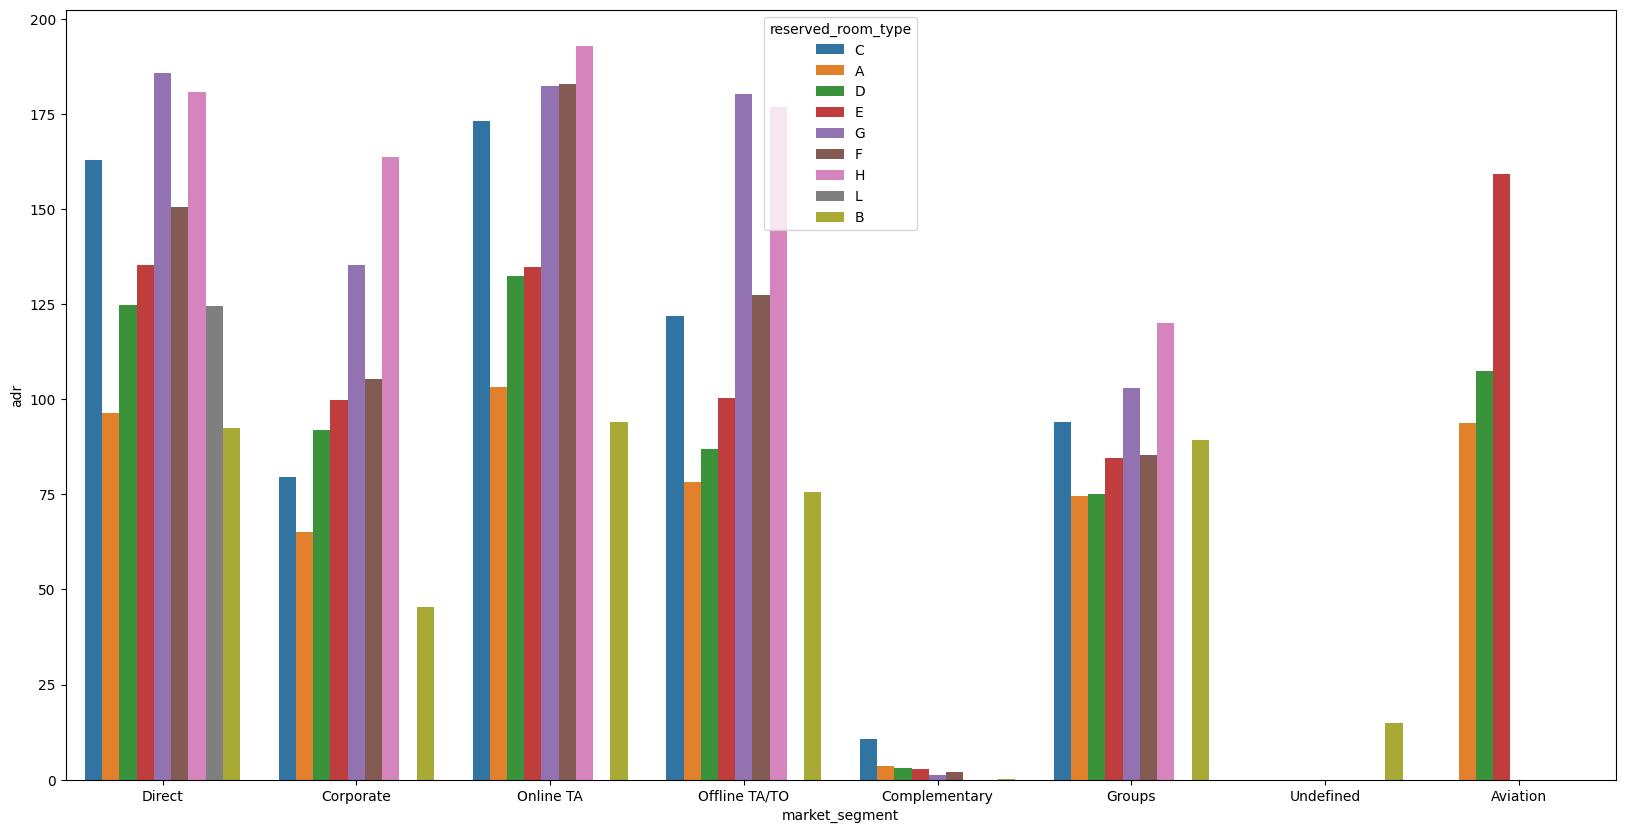

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr',data=data,ci=None,hue='reserved_room_type')
#default value of est is mean we can change to sum in seaborn 

__Total guest arrival in each day__

In [135]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [136]:
data[[ 'arrival_date_year','arrival_date_month', 'arrival_date_week_number']]

,arrival_date_year,arrival_date_month,arrival_date_week_number
0,2015,July,27
1,2015,July,27
2,2015,July,27
3,2015,July,27
4,2015,July,27
...,...,...,...
119385,2017,August,35
119386,2017,August,35
119387,2017,August,35
119388,2017,August,35


In [140]:
data.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [147]:
data.arrival_date_month=data.arrival_date_month.map({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6})

In [148]:
data.arrival_date_month

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 87230, dtype: int64

In [149]:
data[[ 'arrival_date_year','arrival_date_month', 'arrival_date_week_number']]

,arrival_date_year,arrival_date_month,arrival_date_week_number
0,2015,7,27
1,2015,7,27
2,2015,7,27
3,2015,7,27
4,2015,7,27
...,...,...,...
119385,2017,8,35
119386,2017,8,35
119387,2017,8,35
119388,2017,8,35


In [162]:
data['ar_date']=data['arrival_date_year'].astype(str)+'-'+data['arrival_date_month'].astype(str)+'-'+data['arrival_date_day_of_month'].astype(str)

In [163]:
data.ar_date.unique()

array(['2015-7-1', '2015-7-2', '2015-7-3', '2015-7-4', '2015-7-5',
       '2015-7-6', '2015-7-7', '2015-7-8', '2015-7-9', '2015-7-10',
       '2015-7-11', '2015-7-12', '2015-7-13', '2015-7-14', '2015-7-15',
       '2015-7-16', '2015-7-17', '2015-7-18', '2015-7-19', '2015-7-20',
       '2015-7-21', '2015-7-22', '2015-7-23', '2015-7-24', '2015-7-25',
       '2015-7-26', '2015-7-27', '2015-7-28', '2015-7-29', '2015-7-30',
       '2015-7-31', '2015-8-1', '2015-8-2', '2015-8-3', '2015-8-4',
       '2015-8-5', '2015-8-6', '2015-8-7', '2015-8-8', '2015-8-9',
       '2015-8-10', '2015-8-11', '2015-8-12', '2015-8-13', '2015-8-14',
       '2015-8-15', '2015-8-16', '2015-8-17', '2015-8-18', '2015-8-19',
       '2015-8-20', '2015-8-21', '2015-8-22', '2015-8-23', '2015-8-24',
       '2015-8-25', '2015-8-26', '2015-8-27', '2015-8-28', '2015-8-29',
       '2015-8-30', '2015-8-31', '2015-9-1', '2015-9-2', '2015-9-3',
       '2015-9-4', '2015-9-5', '2015-9-6', '2015-9-7', '2015-9-8',
       '2015-9-9',

In [153]:
data.ar_date

0         2015-7-27
1         2015-7-27
2         2015-7-27
3         2015-7-27
4         2015-7-27
            ...    
119385    2017-8-35
119386    2017-8-35
119387    2017-8-35
119388    2017-8-35
119389    2017-8-35
Name: ar_date, Length: 87230, dtype: object

In [154]:
total_gt=data.children+data.adults+data.babies

In [155]:
total_gt

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Length: 87230, dtype: float64

In [156]:
data['t_g']=data.children+data.adults+data.babies

In [157]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'ar_date', 't_g'],
      dtype='object')

In [171]:
datanc=data[data['is_canceled']==0]

In [169]:
data[['ar_date', 't_g']].value_counts()

ar_date     t_g 
2017-4-29   2.0     186
2017-5-5    2.0     160
2016-10-29  2.0     160
2016-6-26   2.0     159
2016-5-21   2.0     148
                   ... 
2016-10-1   5.0       1
2015-9-4    4.0       1
2016-11-29  4.0       1
2015-10-6   20.0      1
2015-9-3    40.0      1
Name: count, Length: 3192, dtype: int64

In [173]:
guest_arrival=datanc.groupby(['ar_date'])['t_g'].sum()

In [179]:
guest_arrival

ar_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: t_g, Length: 793, dtype: float64

<Axes: xlabel='ar_date'>

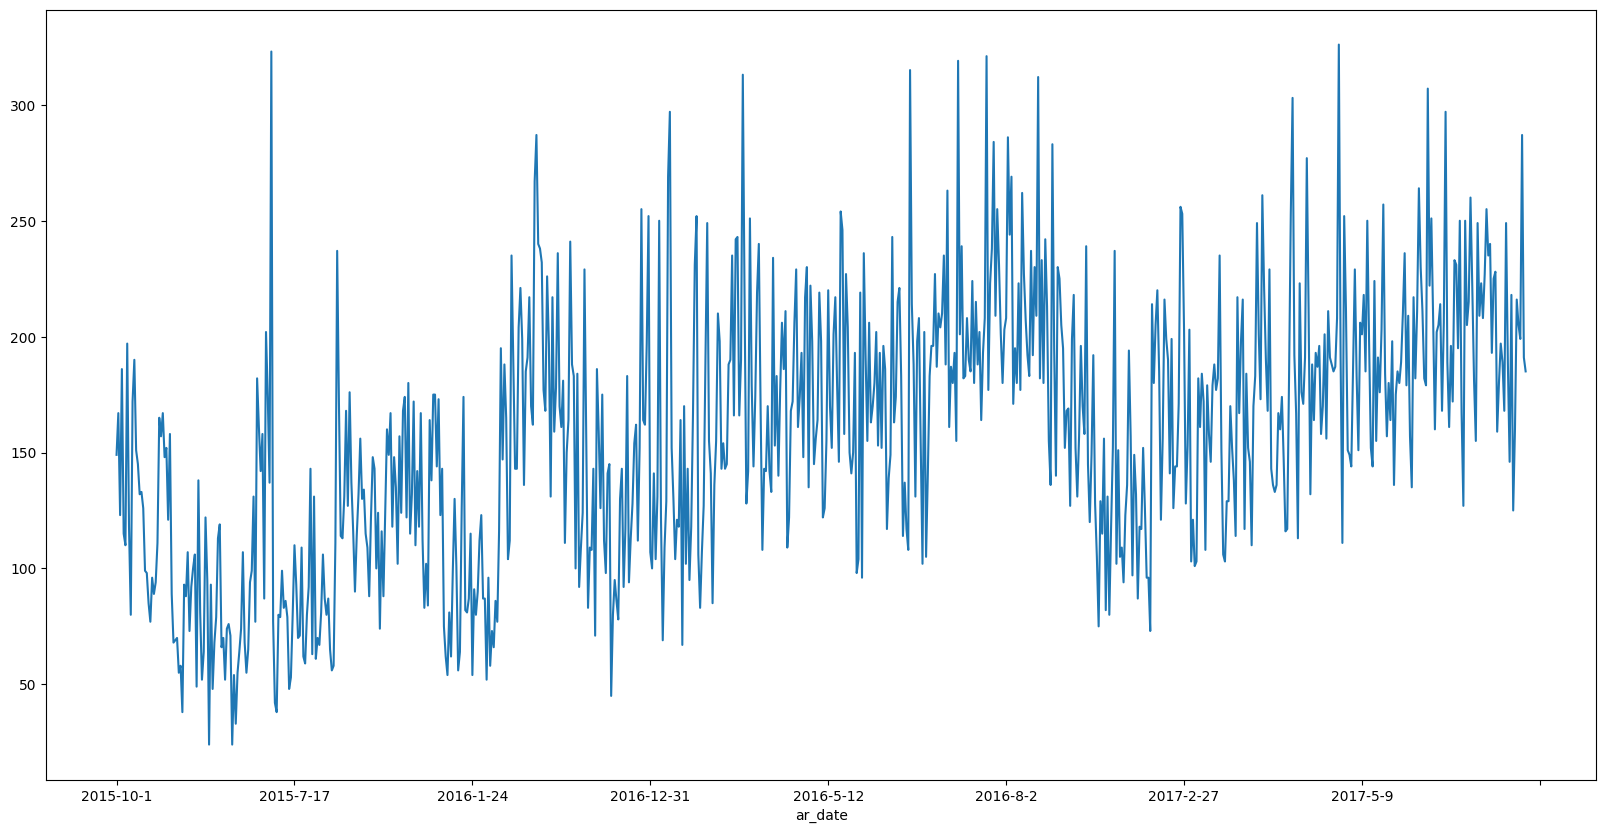

In [178]:
guest_arrival.plot(figsize=(20,10))

__Guest arrival distribution__

In [181]:
guest_arrival.values

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

c:\Users\tirth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



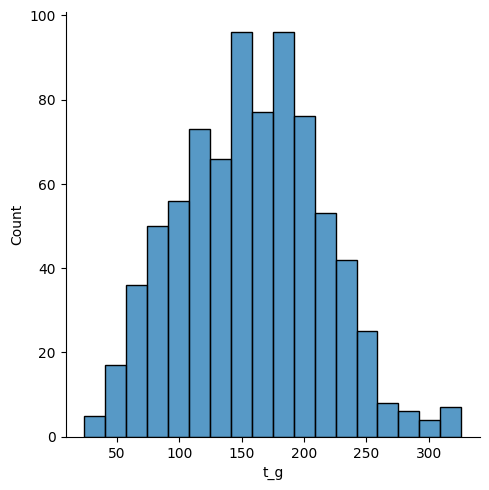

In [185]:
sns.displot(guest_arrival)

c:\Users\tirth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



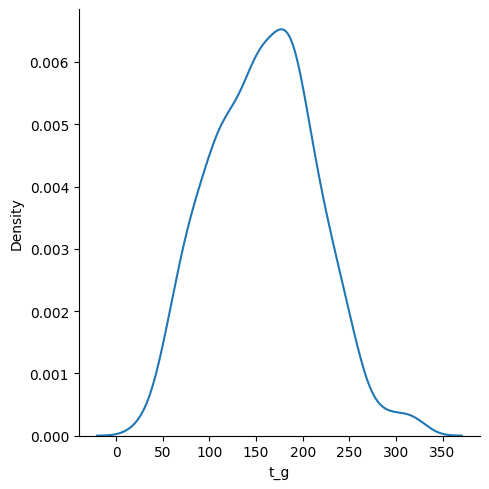

In [184]:
sns.displot(guest_arrival,kind='kde')

In [186]:
np.mean(guest_arrival)

157.92559899117276

In [187]:
np.median(guest_arrival)

158.0

In [188]:
np.std(guest_arrival)

56.48263702610786